In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

In [28]:
##Remote sensing data:

# df_rs = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/Streamlined/df_remotedata.csv')
##Above: needs to be merged with biomass data (df_sum)
# df1 = pd.merge(df_rs, df_sum, how = 'right')

dfv = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_yr.csv')
# dfw = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_octnov.csv') ##BAD
dfx = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_augoct.csv')
dfy = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_sepoct.csv')
# dfz = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Virginia/Streamlined/va_oct.csv') ##BAD

dfv.rename(
    columns={
        'ndvi':'ndvi_yr','savi':'savi_yr','wdrvi5':'wdrvi5_yr','nd_r_g':'nd_r_g_yr', 'nd_g_b':'nd_g_b_yr',
        'nd_swir2_nir':'nd_swir2_nir_yr', 'nd_swir2_r':'nd_swir2_r_yr'
    }, inplace=True
)

# dfw.rename(
#     columns={
#         'ndvi':'ndvi_octnov','savi':'savi_octnov','wdrvi5':'wdrvi5_octnov','nd_r_g':'nd_r_g_octnov', 'nd_g_b':'nd_g_b_octnov',
#         'nd_swir2_nir':'nd_swir2_nir_octnov', 'nd_swir2_r':'nd_swir2_r_octnov'
#     }, inplace=True
# )

dfx.rename(
    columns={
        'ndvi':'ndvi_augoct','savi':'savi_augoct','wdrvi5':'wdrvi5_augoct','nd_r_g':'nd_r_g_augoct', 'nd_g_b':'nd_g_b_augoct',
        'nd_swir2_nir':'nd_swir2_nir_augoct', 'nd_swir2_r':'nd_swir2_r_augoct'
    }, inplace=True
)

dfy.rename(
    columns={
        'ndvi':'ndvi_sepoct','savi':'savi_sepoct','wdrvi5':'wdrvi5_sepoct','nd_r_g':'nd_r_g_sepoct', 'nd_g_b':'nd_g_b_sepoct',
        'nd_swir2_nir':'nd_swir2_nir_sepoct', 'nd_swir2_r':'nd_swir2_r_sepoct'
    }, inplace=True
)


# df9 = pd.merge(dfw, dfv, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')
# df8 = pd.merge(dfx, dfy, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')
# df0 = pd.merge(df9, df8, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')
# df1 = pd.merge(dfz, df0, on = ['Year', 'Code', 'locationID', 'Replicate', 'Latitude', 'Longitude', 'liveMass'], how = 'left')

# df0 = pd.merge(dfx, dfy, on = ['Latitude', 'Longitude', 'Plant_Biomass', 'Year'], how = 'left')
# df1 = pd.merge(dfz, df0, on = ['Latitude', 'Longitude', 'Plant_Biomass', 'Year'], how = 'left')

df0 = pd.merge(dfv, dfx, on = ['Year','locationID','Transect','Latitude','Longitude'], how = 'left')
df1 = pd.merge(df0, dfy, on = ['Year','locationID','Transect','Latitude','Longitude'], how = 'left')


df1['ident'] = df1['ndvi_yr'] * df1['ndvi_augoct'] * df1['ndvi_sepoct']

display(df1) ##STILL SEEMS LIKE THERE ARE DUPLICATES

,Year,locationID,Latitude,liveMass_x,Longitude,Transect,N_x,B2_x,B3_x,B4_x,...,NIR_band,SWIR1_band,SWIR2_band,savi_sepoct,wdrvi5_sepoct,nd_r_g_sepoct,nd_g_b_sepoct,nd_swir2_nir_sepoct,nd_swir2_r_sepoct,ident
0,1999,1,37.167147,46.72,-75.940768,A,2,0.052050,0.054175,0.086750,...,0.068300,0.054300,0.035800,0.067466,-0.089940,-0.020359,0.132979,-0.312200,-0.066493,0.014553
1,1999,1,37.174764,399.68,-75.942417,A,2,0.053340,0.054900,0.098160,...,0.077000,0.077900,0.040100,0.087636,-0.030227,0.036755,0.151515,-0.315115,-0.009877,0.026498
2,1999,1,37.180976,441.68,-75.940766,A,2,0.057950,0.057875,0.115750,...,0.107700,0.086900,0.044300,0.145102,0.093956,-0.029380,0.183980,-0.417105,-0.003375,0.057219
3,1999,1,37.287699,669.60,-75.929487,A,2,0.053940,0.054620,0.150000,...,0.169600,0.107900,0.057100,0.273957,0.358974,-0.017199,0.269939,-0.496251,0.176107,0.178212
4,1999,1,37.345970,875.52,-75.901065,A,2,0.075975,0.079763,0.149487,...,0.138700,0.134500,0.069800,0.178325,0.105620,0.035055,0.163515,-0.330456,0.108817,0.054684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2017,3,37.287875,96.08,-75.929008,B,2,0.036187,0.054947,0.049860,...,0.239350,0.161750,0.082300,0.372871,0.457896,-0.044039,0.186089,-0.488264,0.298107,0.324417
1004,2017,3,37.167768,26.56,-75.944280,C,2,0.053407,0.070279,0.076121,...,0.182650,0.190350,0.117750,0.215164,0.104126,0.051064,0.134860,-0.216045,0.227521,0.080676
1005,2017,3,37.449973,279.36,-75.671952,C,1,0.038233,0.049422,0.048778,...,0.224467,0.145900,0.073100,0.349052,0.424582,-0.077966,0.155104,-0.508682,0.234450,0.261523
1006,2018,1,37.396051,255.04,-75.876056,C,1,0.050643,0.067657,0.072257,...,0.231900,0.200133,0.104833,0.309689,0.267790,-0.006429,0.155593,-0.377351,0.220411,0.149712


In [35]:
##Modeling
df1.rename(columns={'elevation':'Elevation'}, inplace=True)
df1 = df1[df1['ident'].notna()] ##remove rows with NaN for columns used in the model 
df1 = df1[df1['prcp'].notna()] ##CAREFUL; added 7/11/22
df1 = df1[(df1['flats'] < 0.1)] ##TIDAL FILTERING STEP!

from sklearn.model_selection import train_test_split
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime

# df1['Date'] = pd.to_datetime(df1.Date, format='%m/%d/%Y')
# df1['DOY'] = df1['Date'].dt.strftime('%j') ##Add day of year (DOY) to dataset
# df1['DOY'] = df1['Date'].dt.strftime('%j').astype('float') ##The astype('float') is only for the regression - not for ML 

xargs=df1[
    [
        'Elevation', 'tmax', 'tmin', 'ndvi_augoct',
        'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct','ndvi_sepoct',
        'savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct','nd_swir2_nir_sepoct', 'nd_swir2_r_sepoct','ndvi_yr',
        'savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr','nd_swir2_nir_yr', 'nd_swir2_r_yr'
    ]
]

yargs=df1['liveMass'] 

##NEED SEASONAL DAYMET DATA
#removed: 'nd_r_g','dayl','sn_prcp', 'sn_dayl', 'sn_srad', 'sn_vp', 'vp', 'srad', 'prcp'

##Include lag variables (e.g. lag ndvi), precip, temp, more

##ELEVATION NEEDS TO BE TRIPLE-CHECKED AT EACH PLOT TO MAKE SURE VALUES CORRESPOND

size_x = 0.2
seed = 3
xargs_train, xargs_test, yargs_train, yargs_test = train_test_split(xargs, yargs, test_size=size_x, random_state = seed) 
## 80% training and 20% test

In [36]:
#Pipeline:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
pipe = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestRegressor(n_estimators=100, random_state=seed))])
pipe.fit(xargs_train, yargs_train)
y_pred=pipe.predict(xargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yargs_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred)))
r_square = metrics.r2_score(yargs_test, y_pred)
print("The r squared is: " + str(r_square))
print(r_square)
print('testing r2 is: ' + str(pipe.score(xargs_test, yargs_test)))
print('training r2 is: ' + str(pipe.score(xargs_train, yargs_train)))
print('NRMSE is: ' + str(np.sqrt(metrics.mean_squared_error(yargs_test, y_pred))/np.ptp(yargs_test)))

# Mean
print('MEAN BASELINE:')
y_pred_mean = [np.mean(yargs_train)] * len(yargs_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(yargs_test, y_pred_mean))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yargs_test, y_pred_mean)))

# NDVI
print('NDVI BASELINE: unfinished')

Mean Absolute Error: 249.18504527306968
Mean Squared Error: 126256.39749275634
Root Mean Squared Error: 355.3257624951452
The r squared is: 0.20902062562468116
0.20902062562468116
testing r2 is: 0.20902062562468116
training r2 is: 0.8937064361287905
NRMSE is: 0.13965890108446738
MEAN BASELINE:
Mean Absolute Error: 303.95051816285485
Root Mean Squared Error: 401.8375171347581
NDVI BASELINE: unfinished


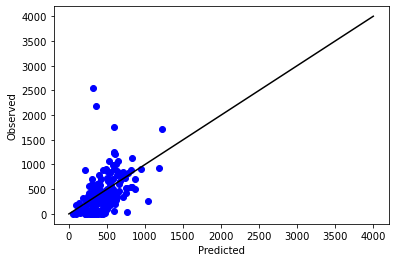

test data correlation coefficient is: 0.4685727231756042
train data correlation coefficient is: 0.9732678586668582


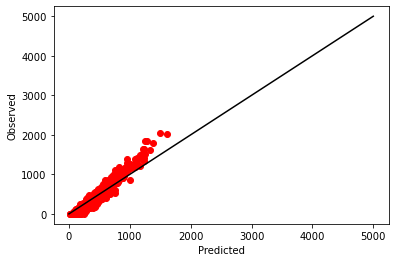

In [37]:
plt.scatter(y_pred, yargs_test, color = 'blue') ##label axes - x,y in order?
# plt.plot(X_val, regressor.predict(X_val), color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 4000], [0, 4000], 'k-')
plt.show()

print('test data correlation coefficient is: ' + str(np.corrcoef(yargs_test, y_pred)[0, 1]))

train_pred = pipe.predict(xargs_train) ##Not sure if this is the right thing to do here
plt.scatter(train_pred, yargs_train, color = 'red')
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.plot([0, 5000], [0, 5000], 'k-')
plt.show

print('train data correlation coefficient is: ' + str(np.corrcoef(train_pred, yargs_train)[0, 1]))

In [20]:
##k-fold cross validation; random forest

predictors = df1[
    [
        'ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b','wdrvi5', 'savi', 'Elevation', 'tmax', 'tmin', 'DOY', 'ndvi_augoct',
        'savi_augoct','wdrvi5_augoct','nd_r_g_augoct','nd_g_b_augoct','nd_swir2_nir_augoct', 'nd_swir2_r_augoct',
        'ndvi_sepoct','savi_sepoct','wdrvi5_sepoct','nd_r_g_sepoct','nd_g_b_sepoct', 'nd_swir2_nir_sepoct', 
        'nd_swir2_r_sepoct','ndvi_octnov','savi_octnov','wdrvi5_octnov','nd_r_g_octnov','nd_g_b_octnov',
        'nd_swir2_nir_octnov', 'nd_swir2_r_octnov','ndvi_yr','savi_yr','wdrvi5_yr','nd_r_g_yr','nd_g_b_yr',
        'nd_swir2_nir_yr', 'nd_swir2_r_yr'
    ]
]

targets = df1['Plant_Biomass'] 

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import load_boston

X, y = predictors, targets
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

model = pipe
scoring=('r2', 'neg_root_mean_squared_error')

cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
cv_results

##from: https://stackoverflow.com/questions/55270431/how-to-correctly-perform-cross-validation-in-scikit-learn

KeyError: "['ndvi', 'nd_swir2_r', 'nd_swir2_nir', 'nd_g_b', 'wdrvi5', 'savi', 'DOY', 'ndvi_octnov', 'savi_octnov', 'wdrvi5_octnov', 'nd_r_g_octnov', 'nd_g_b_octnov', 'nd_swir2_nir_octnov', 'nd_swir2_r_octnov'] not in index"

In [ ]:
##Feature selection
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()